# Mounting Google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd gdrive/My Drive/yolov4_traffic_sign_detection

/content/gdrive/My Drive/yolov4_traffic_sign_detection


In [4]:
!ls

classes.names  dataset_examples.jpg  ts
darknet        test.txt		     ts.zip
data	       train.txt	     yolov4_traffic_sign_detection


# Downloading the dataset

In [5]:
'''!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4" -O ts.zip
!unzip ts.zip
!rm -f ts.zip
!pip install wget
import wget
url = "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4"
myfile = wget.download(url)
import zipfile
unzip = zipfile.ZipFile('ts.zip')
unzip.extractall('data')
'''

'!wget --no-check-certificate "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4" -O ts.zip\n!unzip ts.zip\n!rm -f ts.zip\n!pip install wget\nimport wget\nurl = "https://onedrive.live.com/download?cid=A86CBC7F31A1C06B&resid=A86CBC7F31A1C06B%21121&authkey=AMUUk0Np4tqH3n4"\nmyfile = wget.download(url)\nimport zipfile\nunzip = zipfile.ZipFile(\'ts.zip\')\nunzip.extractall(\'data\')\n'

In [6]:
import os
path =  os.getcwd()

In [7]:
path

'/content/gdrive/My Drive/yolov4_traffic_sign_detection'

# Sample dataset

00216.txt: 
0 0.2386029411764706 0.568125 0.01838235294117647 0.03125
0 0.6606617647058823 0.57375 0.01838235294117647 0.0325

00191.txt: 
1 0.5224264705882353 0.528125 0.025735294117647058 0.04125

00185.txt: 
0 0.7511029411764706 0.254375 0.08014705882352942 0.13375

00217.txt: 
0 0.7360294117647059 0.371875 0.04411764705882353 0.07625



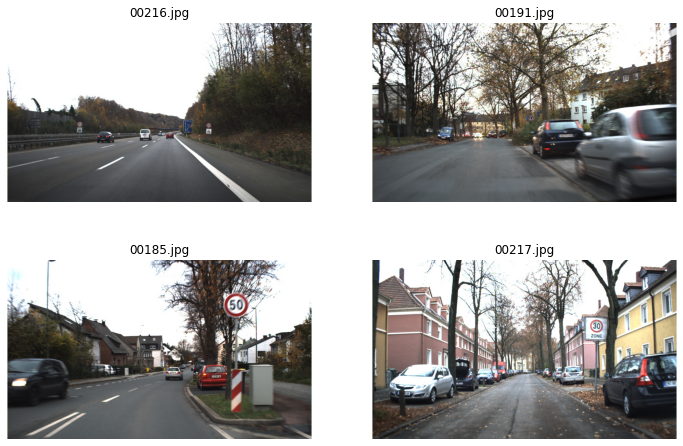

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("/content/gdrive/MyDrive/yolov4_traffic_sign_detection/data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("dataset_examples.jpg", dpi=300)

# Creating the sandbox

In [9]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [10]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/gdrive/MyDrive/yolov4_traffic_sign_detection/darknet


In [11]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [12]:
!ls data/

9k.tree		      dog.jpg		    imagenet.shortnames.list  train.txt
coco9k.map	      eagle.jpg		    labels		      ts
coco.names	      giraffe.jpg	    openimages.names	      voc.names
data.data	      goal.txt		    person.jpg
data.names	      horses.jpg	    scream.jpg
dataset_examples.jpg  imagenet.labels.list  test.txt


In [13]:
!chmod +x ./darknet

## Change parameters in cfg/yolov4-custom.cfg (to fit to custom dataset)

In [14]:
!./darknet detector train data/data.data cfg/yolov4-custom.cfg yolov4.conv.137  -dont_show 

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-custom
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 

# Trained model Performance

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

# Testing Data

In [14]:
img_path = "data/test.jpg"
!./darknet detector test data/data.data cfg/test-yolov4-custom.cfg backup/yolov4-custom_1000.weights {img_path} -dont-show

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)

In [ ]:
video_path = "data/demo.mp4"

!./darknet detector demo data/data.data cfg/yolov4-custom.cfg backup/yolov4-custom_1000.weights -dont_show data/demo.mp4 -i 0 -out_filename data/results1.avi